In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import layers, models

import os
import cv2

In [3]:
## read data
#path = "../train/image/"
path = "../dataset_images/"
image_files = os.listdir(path)
x_train = [cv2.cvtColor(cv2.imread(os.path.join(path, file), cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB) for file in image_files]

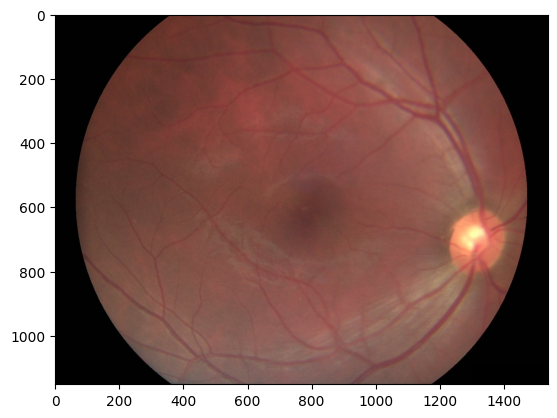

In [4]:
# show a sample image
plt.imshow(x_train[0])
plt.show()

In [5]:
## images have different sizes, options: padding to max size, resize 
## we probably need the circle to stay circle, so padding is better
## padding to max size
# max_r = 0
# max_c = 0
# for image in x_train:
#     if image.shape[0] > max_r:
#         max_r = image.shape[0]
#     if image.shape[1] > max_c:
#         max_c = image.shape[1]
# print("max_r: ", max_r)
# print("max_c: ", max_c)

# x_train_padded = []
# for i in range(len(x_train)):
#     x_train_padded.append(cv2.copyMakeBorder(x_train[i], int(np.ceil((max_r-x_train[i].shape[0])/2)), int((max_r-x_train[i].shape[0])/2),int(np.ceil((max_c-x_train[i].shape[1])/2)), int((max_c-x_train[i].shape[1])/2), cv2.BORDER_CONSTANT, value=[0,0,0]))

# x_train_padded = np.array(x_train_padded)
# print("x_train_padded.shape: ", x_train_padded.shape)
## NOTE=> the sizes varied a lot, so padding is not the best option

## resize
# img_r = 224
# img_c = 224
# x_train = np.array([cv2.resize(image, (img_r,img_c)) for image in x_train])
## NOTE=> the circle is not circle anymore, so resize is not the best option

## customized resize
# remove all zero rows and columns
x_train_cropped = []
for image in x_train:
    # print(~np.all(image == 0, axis=(1,2)))
    # print(np.unique(image))
    # print(image.shape)
    image = image[~np.all(image == 0, axis=(1,2))]
    # print(image.shape)
    image = image[:, ~np.all(image == 0, axis=(0,2))]
    # print(image.shape)
    x_train_cropped.append(image)
#x_train_cropped = np.array(x_train_cropped)
# resize to smallest size -> waste resolution?!
min_r = 10000
min_c = 10000
for image in x_train_cropped:
    if image.shape[0] < min_r:
        min_r = image.shape[0]
    if image.shape[1] < min_c:
        min_c = image.shape[1]
print("min_r: ", min_r)
print("min_c: ", min_c)
x_train_resized = np.array([cv2.resize(image, (min_r,min_c)) for image in x_train_cropped])
## NOTE=> not all backgrounds are zeros so the croping is not working :( :@ 

## custom resize 2
# crop to square first
# x_train_cropped = []
# for image in x_train:
#     if image.shape[0] > image.shape[1]:
#         image = image[int((image.shape[0]-image.shape[1])/2):int((image.shape[0]+image.shape[1])/2), :, :]
#     else:
#         image = image[:, int((image.shape[1]-image.shape[0])/2):int((image.shape[1]+image.shape[0])/2), :]
#     x_train_cropped.append(image)
#     #print(image.shape)

# # resize to smallest size -> waste resolution?!
# min_r = 10000
# min_c = 10000
# for image in x_train_cropped:
#     if image.shape[0] < min_r:
#         min_r = image.shape[0]
#     if image.shape[1] < min_c:
#         min_c = image.shape[1]
# print("min_r: ", min_r)
# print("min_c: ", min_c)
# x_train_resized = np.array([cv2.resize(image, (min_r,min_c)) for image in x_train_cropped])


min_r:  667
min_c:  672


(1137, 1470, 3)


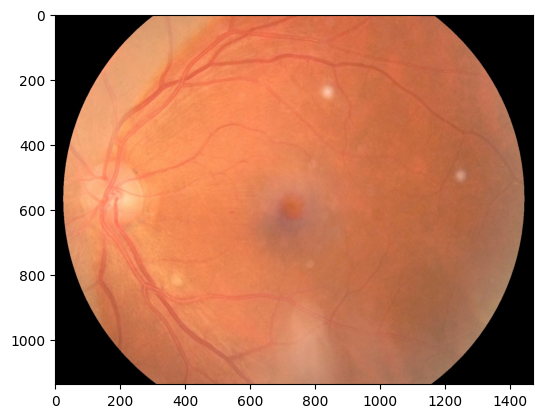

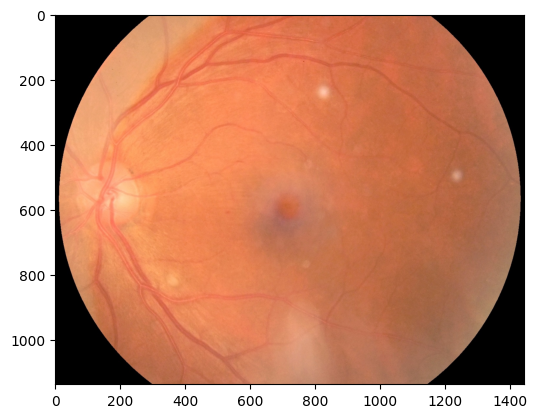

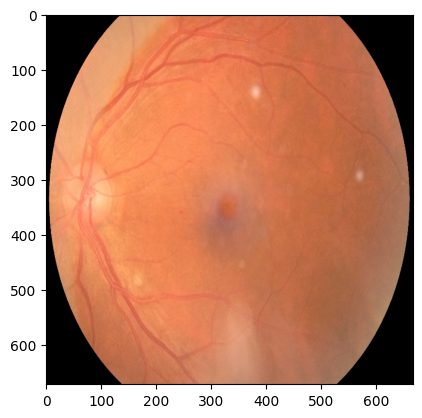

In [18]:
#x_train = np.array(x_train)
idx = np.random.randint(0, len(x_train))
print(x_train[idx].shape)
plt.imshow(x_train[idx])
#plt.imshow(x_train[70][:,:,2], cmap='gray')
plt.show()
plt.imshow(x_train_cropped[idx])
plt.show()
plt.imshow(x_train_resized[idx])

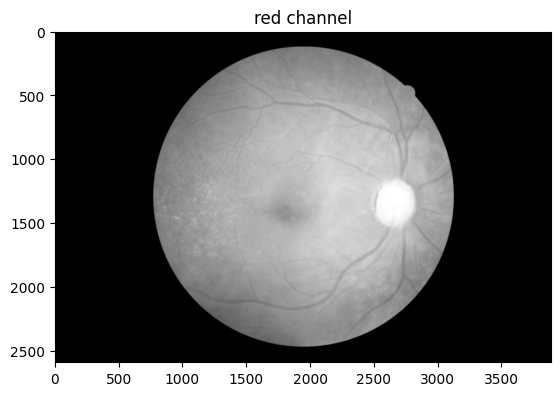

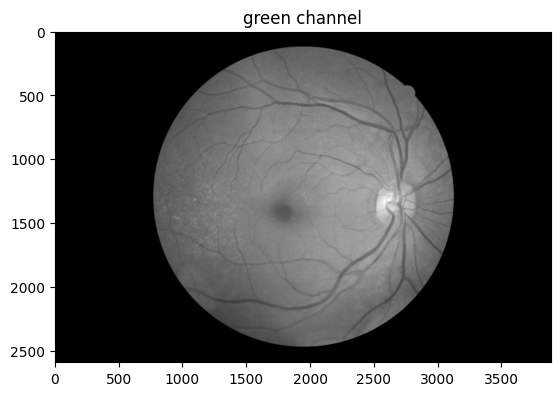

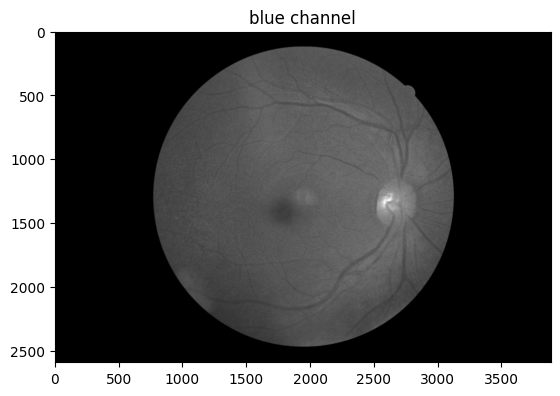

In [7]:
## many researches used the green channel only as it has the best contrast
# explore the green channel
idx = 200
plt.imshow(x_train[idx][:, :, 0], cmap='gray')
plt.title("red channel")
plt.show()
plt.imshow(x_train[idx][:, :, 1], cmap='gray')
plt.title("green channel")
plt.show()
plt.imshow(x_train[idx][:, :, 2], cmap='gray')
plt.title("blue channel")
plt.show()
# notice the green channel has the best contrast
x_train_green = x_train_resized[:,:,:,1]

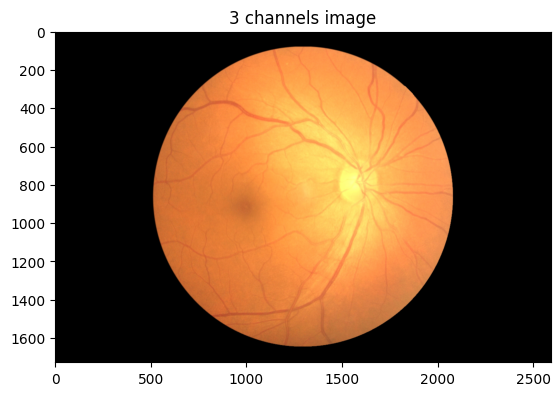

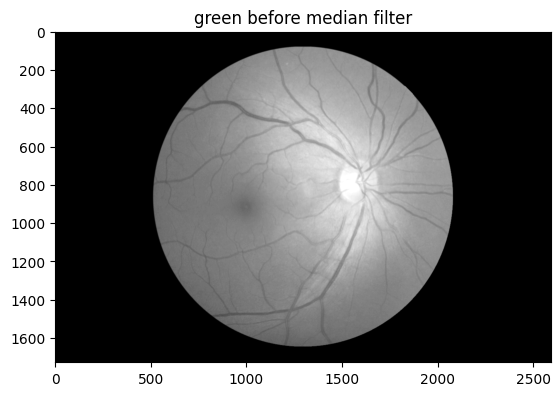

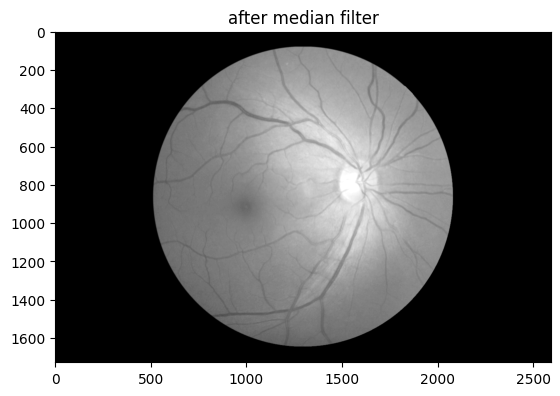

In [8]:
## median filter
from scipy.ndimage import median_filter

# Apply median filter with a specified filter size
filtered_array = median_filter(x_train[230][:, :, 1], size=3)

# Convert the filtered array back to an image
#filtered_image = Image.fromarray(filtered_array)

plt.imshow(x_train[230])
plt.title("3 channels image")
plt.show()
plt.imshow(x_train[230][:, :, 1], cmap='gray')
plt.title("green before median filter")
plt.show()
plt.imshow(filtered_array, cmap='gray')
plt.title("after median filter")
plt.show()

In [9]:
from PIL import Image
path = "C:/Users/olael/Downloads/output.png"
# Open the image file
image = Image.open(path)

# Display some information about the image
print('Image format:', image.format)
print('Image size:', image.size)
print('Image mode:', image.mode)

# Perform operations on the image
# ...
# Display the image
image.show()
# Close the image
image.close()

Image format: PNG
Image size: (422, 416)
Image mode: RGBA
